<a href="https://colab.research.google.com/github/Camillabgarcia/data_science/blob/main/Testando_hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

In [3]:
dados_alturas.head()

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


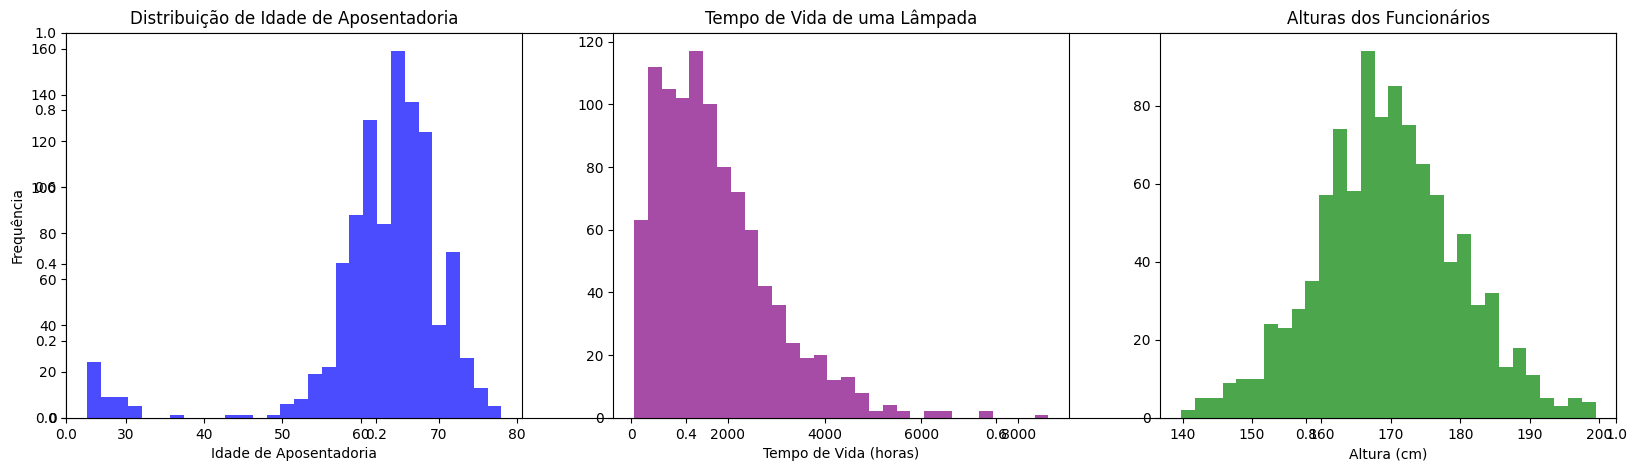

In [4]:
# Várias distribuições
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

Reamostragem de dados de uma indústria de lâmpadas:


In [5]:
from os import replace
#Tamanho de amostra de cada
n = 100

#Quantidade de amostras
qtd = 1000

#Função de reamostragem e cálculo de médias
def reamostragem_medias(dados, coluna, n, qtd):
  medias = [dados[coluna].sample(n, replace=True).mean()for _ in range(qtd)]
  return medias

Aplicando a função em cada distribuição:

In [6]:
media_idade = reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qtd)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n, qtd)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qtd)

Médias das distribuições originais:

In [7]:
print('idade', dados_idade_aposentadoria['idade'].mean())
print('duracao', dados_vida_lampada['duracao'].mean())
print('alturas', dados_alturas['alturas'].mean())

idade 62.70857142857143
duracao 1731.8036029420002
alturas 169.52022


Médias Amostrais:

In [8]:
def Average(lst):
  return sum(lst) / len(lst)

print('idade', Average(media_idade))
print('duracao', Average(media_duracao))
print('altura', Average(media_altura))

idade 62.65932999999994
duracao 1734.5611419799802
altura 169.50267990000023


Distribuição das médias com subplots:

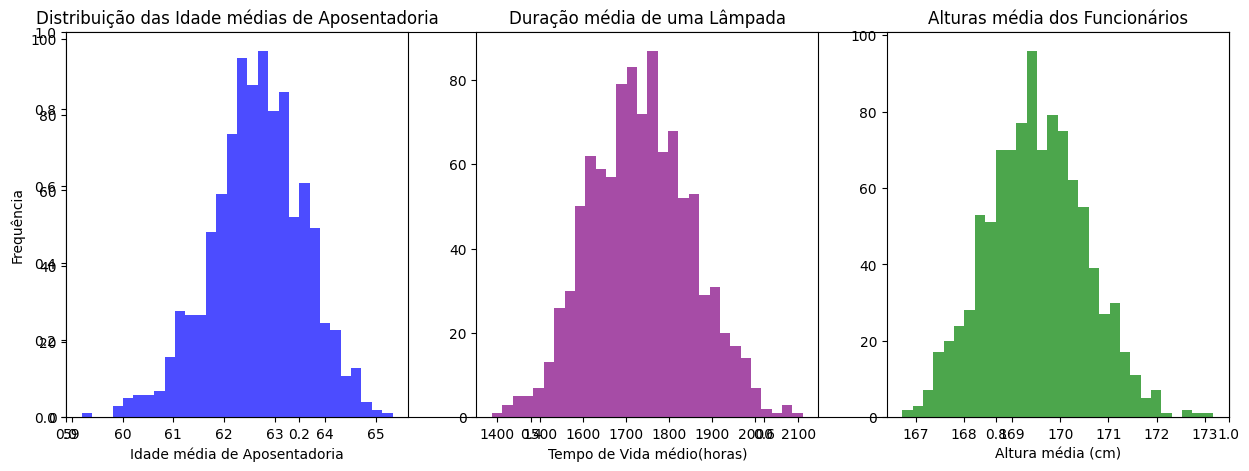

In [9]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

Média da nova amostra:

In [10]:
media_nova_amostra = 1200

Média orginal:

In [11]:
dados_vida_lampada['duracao'].mean()

np.float64(1731.8036029420002)

Quão distante essa média está do comportamento?



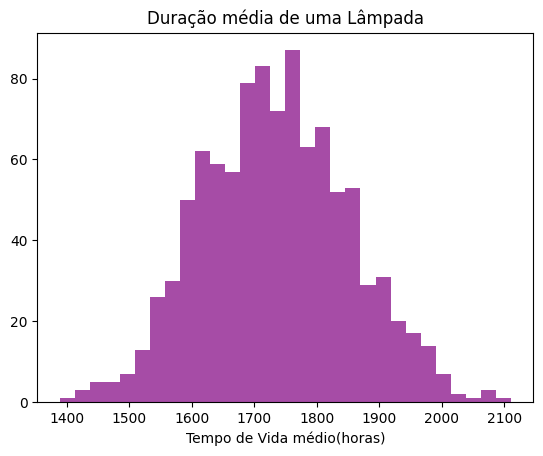

In [12]:
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
             arrowprops=dict(facecolor='green'))
plt.show()

Transformando media_duracao em DataFrame:

In [13]:
duracao_amostra = pd.DataFrame({'media_duracao': media_duracao})

Calculando informações:

In [14]:
media_das_medias = duracao_amostra['media_duracao'].mean()
erro_padrao = duracao_amostra['media_duracao'].std()

print('Médias amostrais')
print('média:', media_das_medias)
print('desvio padrão:', erro_padrao)

Médias amostrais
média: 1734.5611419799798
desvio padrão: 117.76679605961866


Quantos erros:

In [15]:
1731 - 3*erro_padrao

1377.6996118211441

Visualizando a quantidade de amostras entre 3EP +- da média

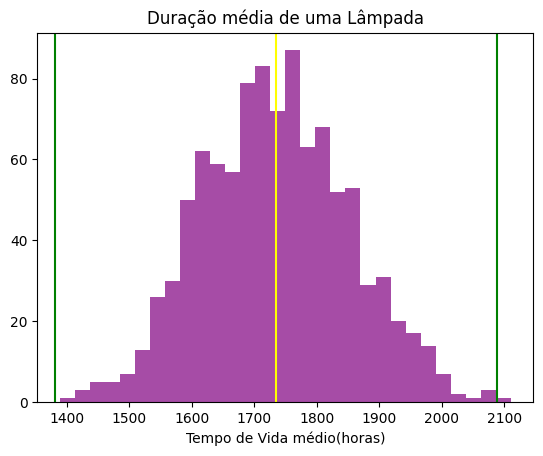

In [16]:
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.axvline(x=media_das_medias, color = 'yellow')
plt.axvline(x=media_das_medias + 3*erro_padrao, color = 'green')
plt.axvline(x=media_das_medias - 3*erro_padrao, color = 'green')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
             arrowprops=dict(facecolor='green'))
plt.show()

Verificando quantas amostras estão entre dos desvios:

In [17]:
qnt_obs = duracao_amostra[(duracao_amostra > media_das_medias - 3*erro_padrao) &
                (duracao_amostra < media_das_medias + 3*erro_padrao)]

O quanto essas informações representam do todo:

In [18]:
qnt_obs.count()/duracao_amostra.count()*100

,0
media_duracao,99.9


 Criando a margem de erro para saber se aciona ou nao o controle de qualidade:

In [19]:
from scipy import stats

In [20]:
# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

Informações para calcular o intervalo de confiança:

In [21]:
media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostra = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [22]:
intervalo_confianca = stats.norm.interval(confianca, loc = media, scale = desvio_padrao_amostra / np.sqrt(tamanho_amostra))

In [23]:
print('IC (95%):', intervalo_confianca)

IC (95%): (np.float64(1658.3741665835485), np.float64(1805.233039300452))


Caso 3: Estabelecer a duração de novas lampadas

- Se a duração média é igual ou diferente de 1570 horas

h0 = hipótese nula
* Duração média é igual a 1570 horas

h1 = hipótese alternativa
* Duração média ***não*** é igual a 1570 horas



In [24]:
lampadas_natalinas = pd.read_csv('/content/experimento_lampadas_natalinas.csv')


In [26]:
#Média amostral
lampadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [28]:
#Informações para a região crítica

confianca = 0.95
desvio_padrao_populacional = 105
tamanho_amostra = len(lampadas_natalinas['duracao'])

In [29]:
#Calculando a margem de erro dentro do intervalo de confiança(REGIÃO CRÍTICA)
#Formula do erro padrão

intervalo = stats.norm.interval(confianca, loc = 1570, scale = desvio_padrao_populacional / np.sqrt(tamanho_amostra))

In [31]:
print('Intervalo de confiançar (95%): ', intervalo)
#Hipótese nula rejeitada (1529), pois não está dentro do IC (1549 - 1590)

Intervalo de confiançar (95%):  (np.float64(1549.4203781623294), np.float64(1590.5796218376706))


Calculando o erro em cima da nossa decisão: